This project is still to go.
This project is written with an IDE in dark theme.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time

In [2]:
df = pd.read_csv('dataset_SCL.csv', encoding = 'Latin-1', low_memory=False)

# Data Preparation

## Dataset review

In [3]:
df.shape

(68206, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÃO       68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## Looking for NaN values

In [5]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÃO         0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

It seems there is one row with nan value in Vlo-O column lets take a look at that row

In [6]:
df[df['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÃO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


We can delete it.

In [7]:
df.dropna(inplace=True)

## Changing column names to easier names

In [8]:
df.rename(columns={'Fecha-I':'sch_fl_time', 'Vlo-I':'sch_fl_no', 'Ori-I':'pr_ori_city_c', 'Des-I':'pr_des_city_c', 'Emp-I':'sch_fl_airline_c', 'Fecha-O':'op_fl_time', 'Vlo-O':'op_fl_no', 'Ori-O':'op_ori_city_c', 'Des-O':'op_des_city_c', 'Emp-O':'op_fl_airline_c', 'DIA':'fl_op_day_in_m', 'MES': 'fl_op_mo', 'AÃO':'fl_op_yr', 'DIANOM':'fl_op_day_in_w', 'TIPOVUELO':'fl_type', 'OPERA':'op_airline', 'SIGLAORI':'ori_city', 'SIGLADES':'des_city'}, inplace=True)

In [9]:
df.head(5)

,sch_fl_time,sch_fl_no,pr_ori_city_c,pr_des_city_c,sch_fl_airline_c,op_fl_time,op_fl_no,op_ori_city_c,op_des_city_c,op_fl_airline_c,fl_op_day_in_m,fl_op_mo,fl_op_yr,fl_op_day_in_w,fl_type,op_airline,ori_city,des_city
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [10]:
df.columns

Index(['sch_fl_time', 'sch_fl_no', 'pr_ori_city_c', 'pr_des_city_c',
       'sch_fl_airline_c', 'op_fl_time', 'op_fl_no', 'op_ori_city_c',
       'op_des_city_c', 'op_fl_airline_c', 'fl_op_day_in_m', 'fl_op_mo',
       'fl_op_yr', 'fl_op_day_in_w', 'fl_type', 'op_airline', 'ori_city',
       'des_city'],
      dtype='object')

## Reformatting columns with datetime objects

In [11]:
# I know the flight day, month, year, and flight day in week were already provided, but I was more confident to do this change of format to the columns of time
df['sch_fl_time'] = pd.to_datetime(df['sch_fl_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
df['op_fl_time'] = pd.to_datetime(df['op_fl_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

## Sorting the dataset based on the scheduled flight time

In [12]:
df.sort_values(by='sch_fl_time', inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.head(5)

,sch_fl_time,sch_fl_no,pr_ori_city_c,pr_des_city_c,sch_fl_airline_c,op_fl_time,op_fl_no,op_ori_city_c,op_des_city_c,op_fl_airline_c,fl_op_day_in_m,fl_op_mo,fl_op_yr,fl_op_day_in_w,fl_type,op_airline,ori_city,des_city
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,1,1,2017,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,1,1,2017,Domingo,I,Grupo LATAM,Santiago,Bogota
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,1,1,2017,Domingo,I,Avianca,Santiago,Bogota
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama


## Making a new column with the calculated flight delay time

A new column named as delay_time is added to the end of the dataset, it contains the differences between the operated flight time (op_fl_time) and scheduled flight time (sch_fl_time) for each flight

In [14]:
fl_delay_time = df['op_fl_time'].sub(df['sch_fl_time']).dt.total_seconds()
# df = df.assign(delay_time_s = fl_delay_time)
df = df.assign(delay_time_m = fl_delay_time/60)

In [15]:
df.head(5)

,sch_fl_time,sch_fl_no,pr_ori_city_c,pr_des_city_c,sch_fl_airline_c,op_fl_time,op_fl_no,op_ori_city_c,op_des_city_c,op_fl_airline_c,fl_op_day_in_m,fl_op_mo,fl_op_yr,fl_op_day_in_w,fl_type,op_airline,ori_city,des_city,delay_time_m
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,1,1,2017,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico,-11.0
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,1,1,2017,Domingo,I,Grupo LATAM,Santiago,Bogota,-5.0
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama,6.0
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,1,1,2017,Domingo,I,Avianca,Santiago,Bogota,5.0
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama,-2.0


It seems some flights had early departure

# 1. How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

We first need to plot the data for each column of interest to identify the best distribution. So, first we should plot them with a histogram. We use distplot.

In [16]:
df.columns

Index(['sch_fl_time', 'sch_fl_no', 'pr_ori_city_c', 'pr_des_city_c',
       'sch_fl_airline_c', 'op_fl_time', 'op_fl_no', 'op_ori_city_c',
       'op_des_city_c', 'op_fl_airline_c', 'fl_op_day_in_m', 'fl_op_mo',
       'fl_op_yr', 'fl_op_day_in_w', 'fl_type', 'op_airline', 'ori_city',
       'des_city', 'delay_time_m'],
      dtype='object')

Below we can see some histograms of delayed flights with distributions of data, as the most of the operated flights have short delay we can't properly see on what days most of delays happened, or which flight or destination city has most of delay times. In this case bubble charts are useful which comes next.

Also, we can clearly see our data has right (positive) skewness, so it does not have a normal distribution, it shows we have some outliers (delayed flights) of the distribution curve (so most of flights are not delayed) accordingly boxplots can be of great choice which comes next.

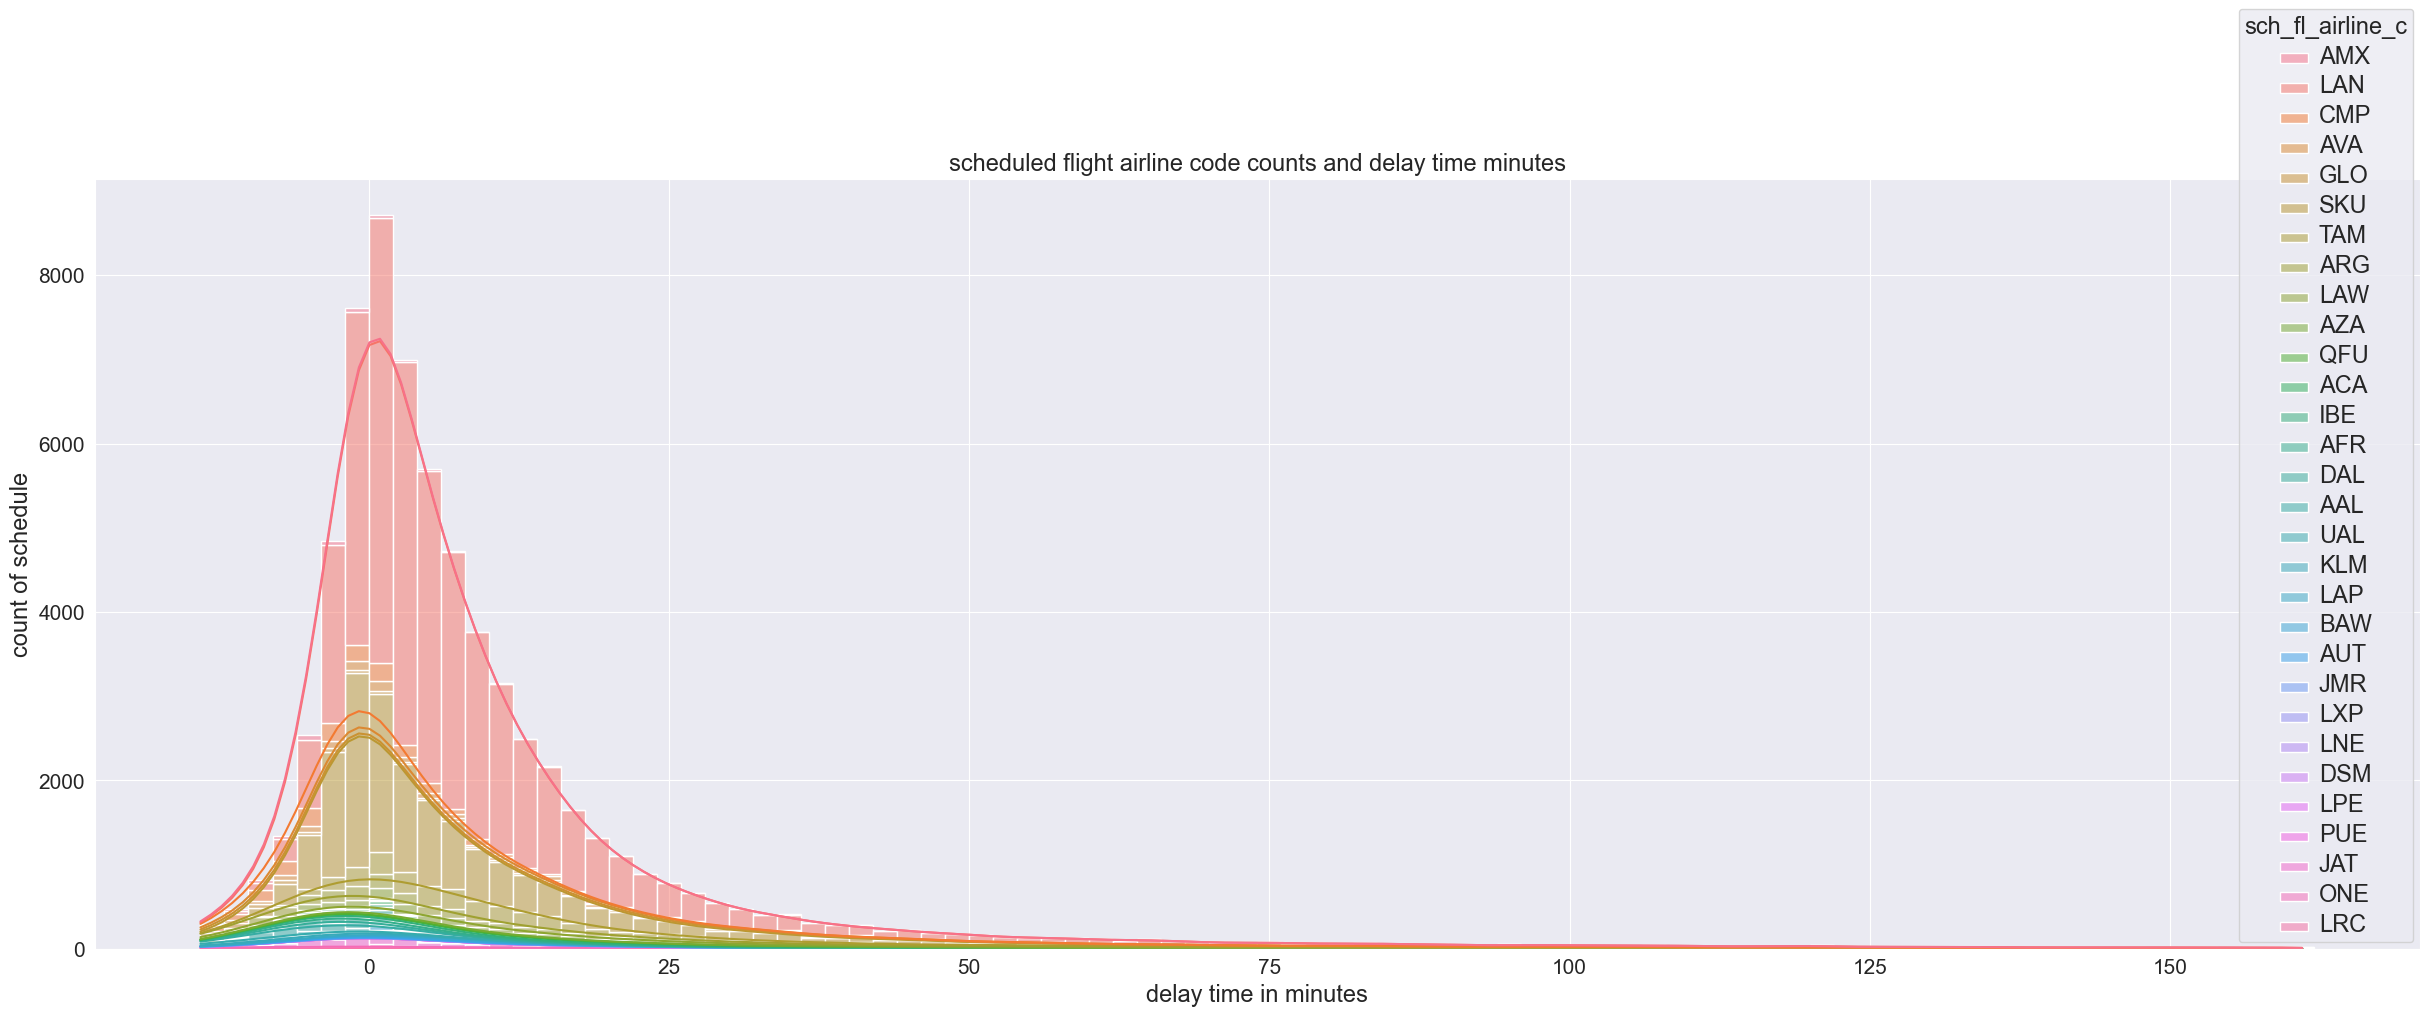

In [17]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='sch_fl_airline_c', multiple='stack', binwidth=2, kde=True)
plt.title('scheduled flight airline code counts and delay time minutes', fontsize=17)
plt.xlabel('delay time in minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of schedule', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

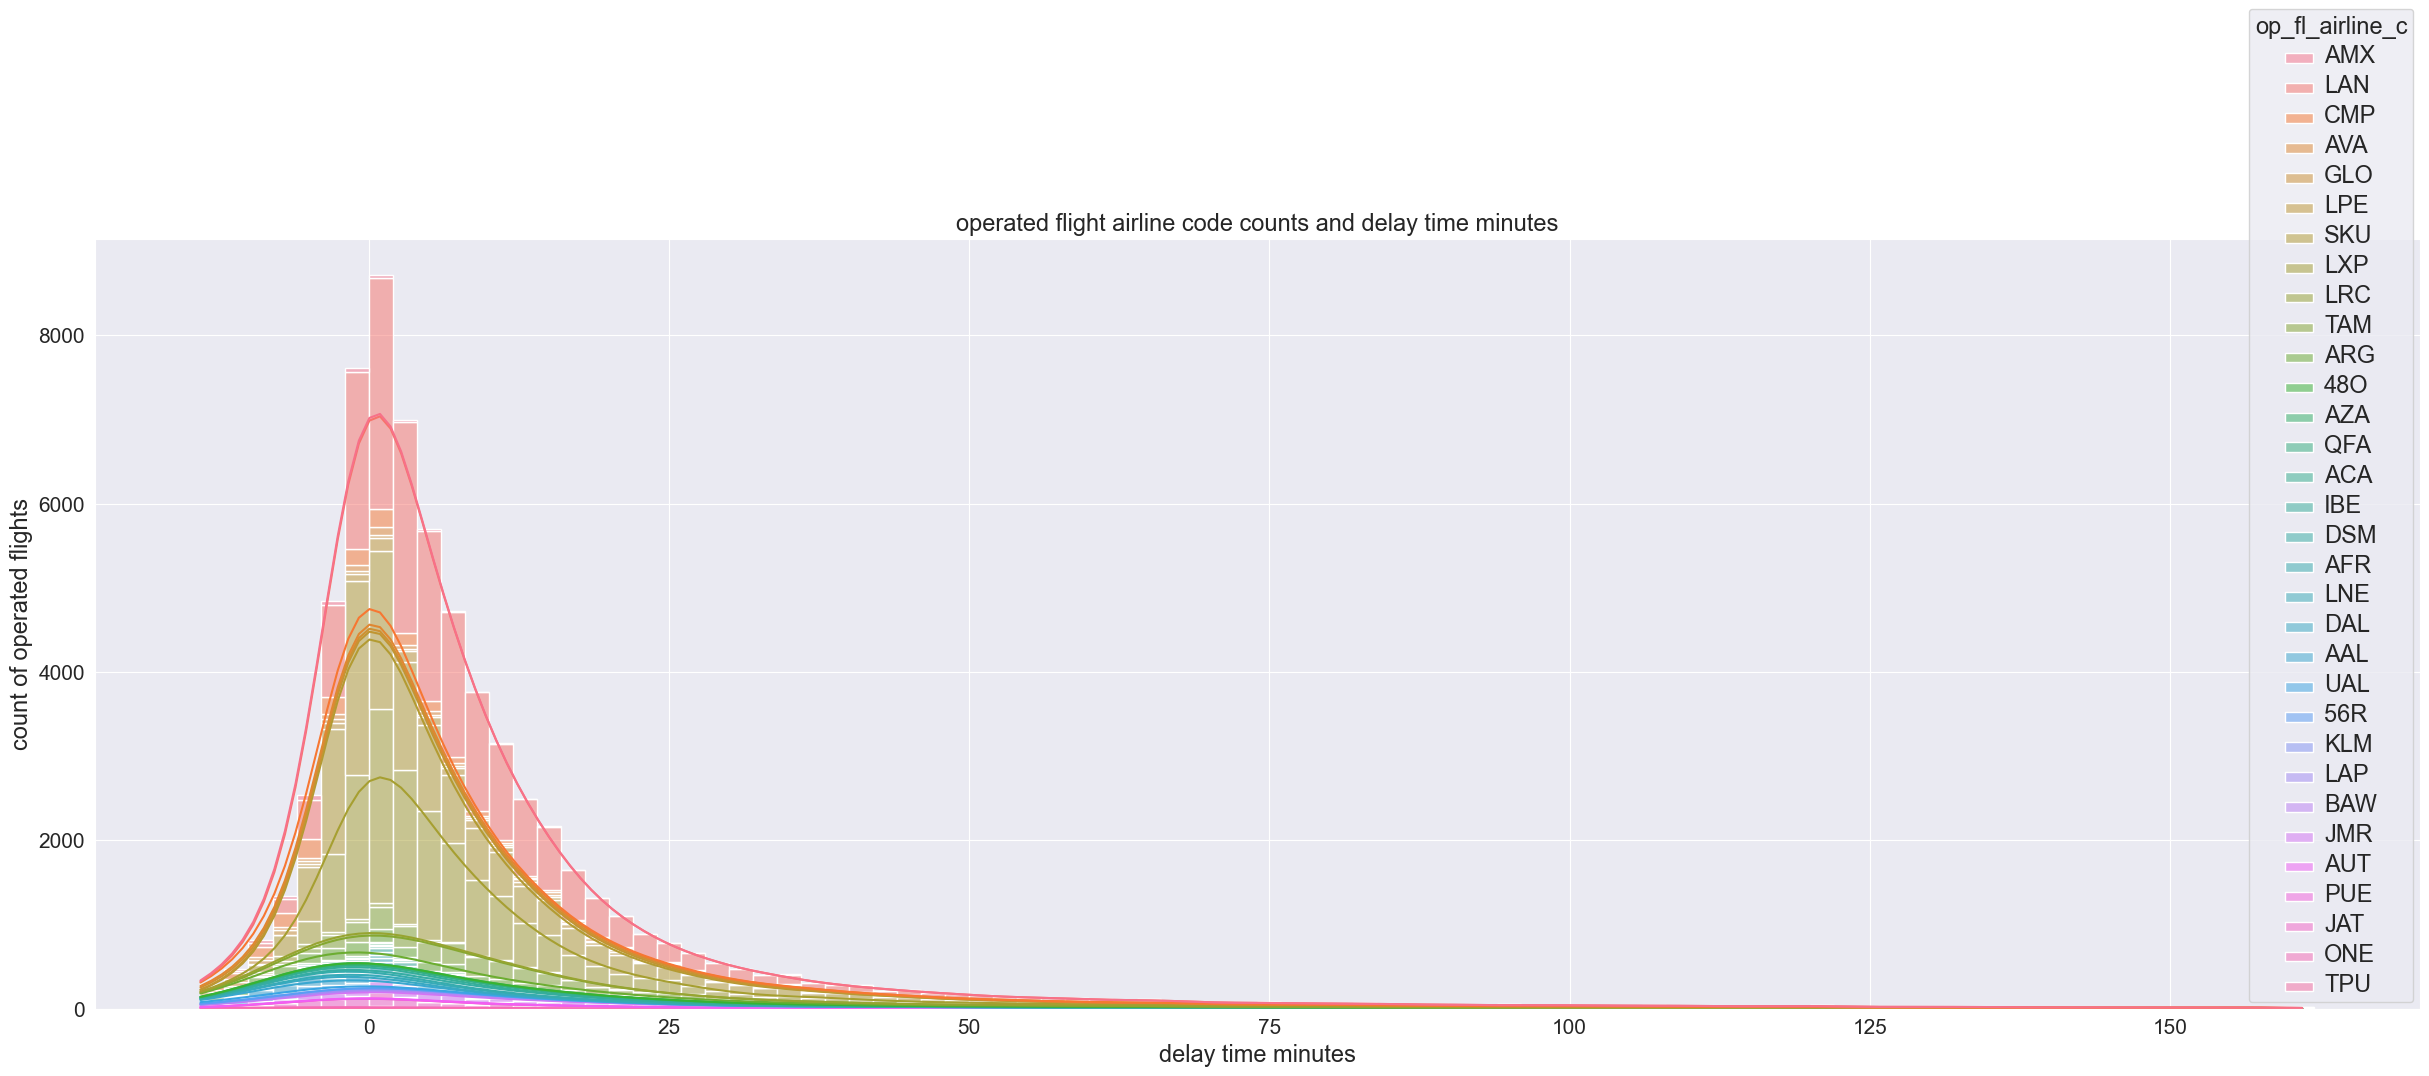

In [18]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='op_fl_airline_c', multiple='stack', binwidth=2, kde=True)
plt.title('operated flight airline code counts and delay time minutes', fontsize=17)
plt.xlabel('delay time minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of operated flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

The above two figures showed considerable change of plans for operated airlines like Aeromexico, It delivered almost half of its flights to be operated by other airlines below itself.

Interesting, the below figure clearly shows more international flights had stacked above the national flights, but for many of them their delay time were almost the same.

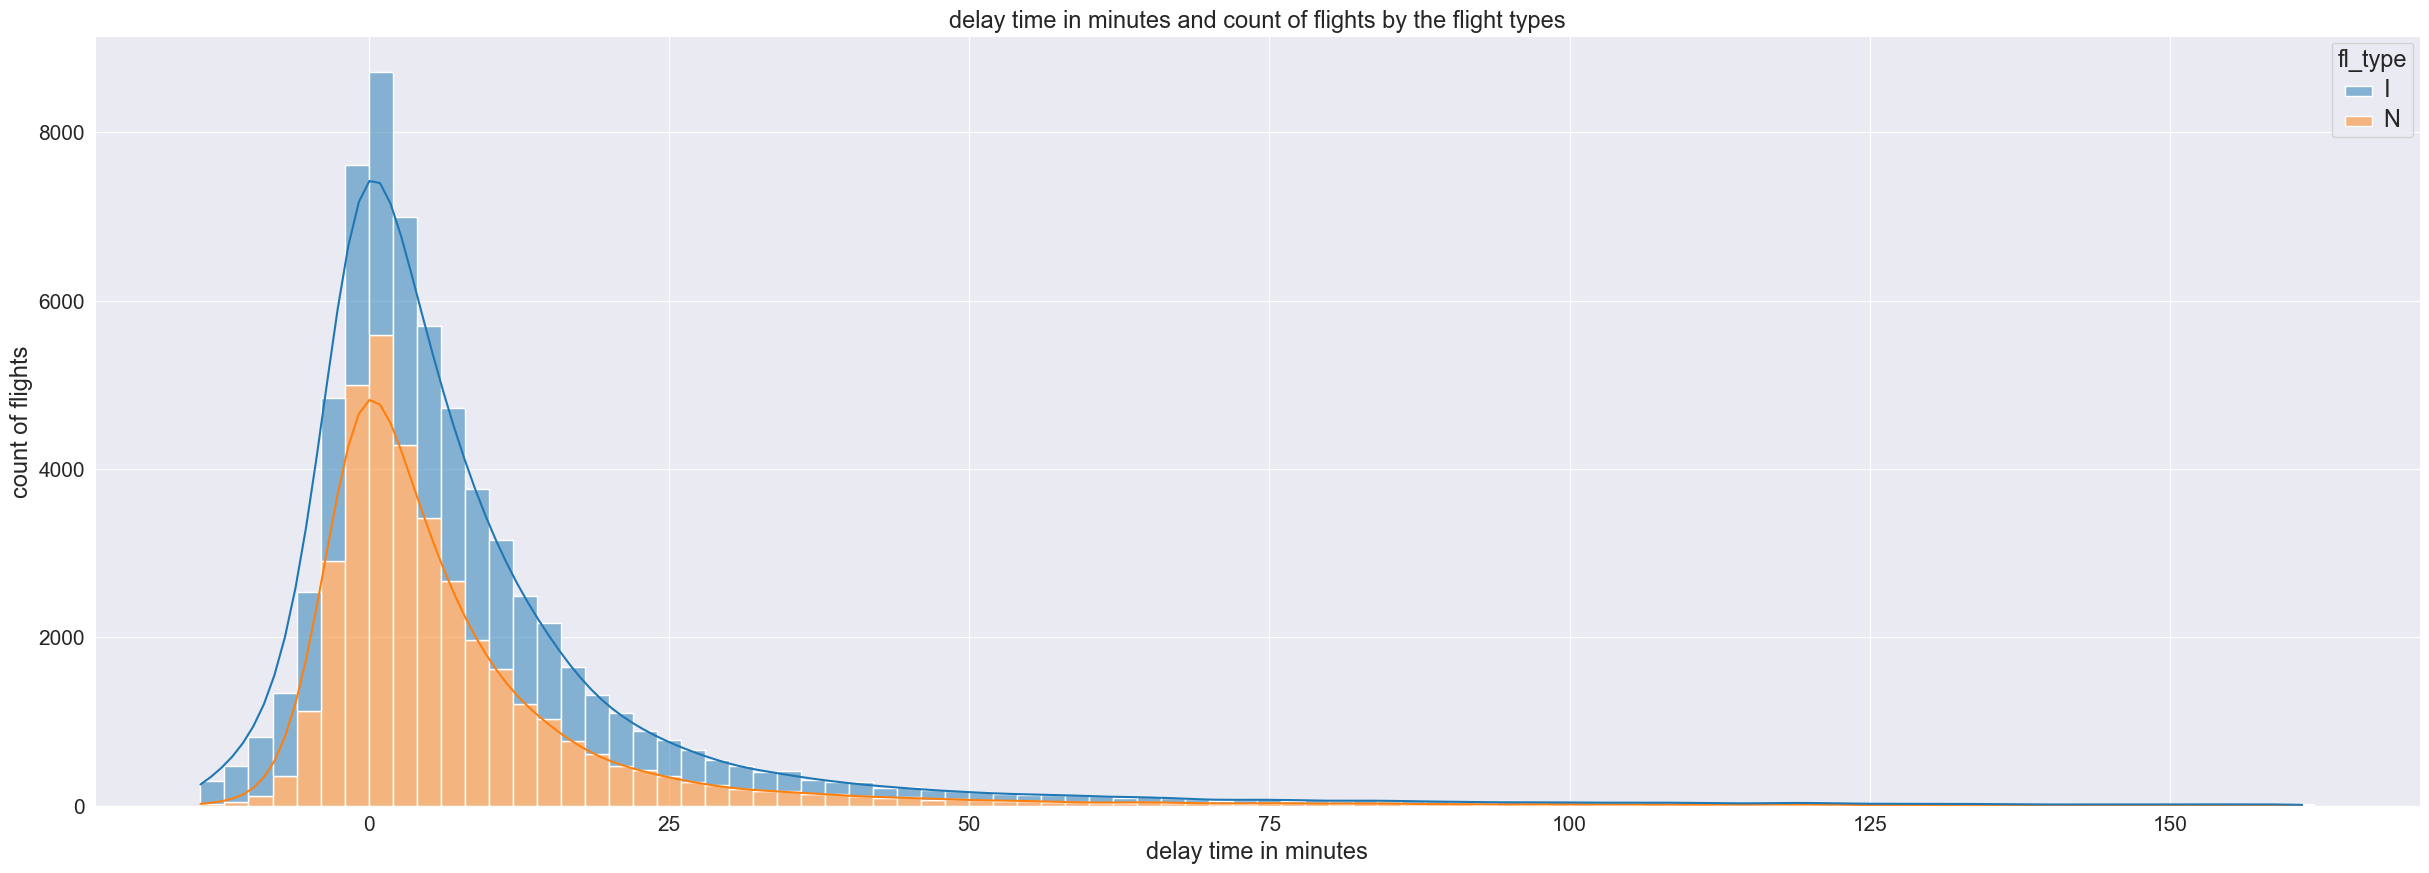

In [24]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='fl_type', multiple='stack', binwidth=2, kde=True)
plt.title('delay time in minutes and count of flights by the flight types', fontsize=17)
plt.xlabel('delay time in minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

Another interesting figure, it shows 2nd half of the year has considerably less flights than the first half of the year.

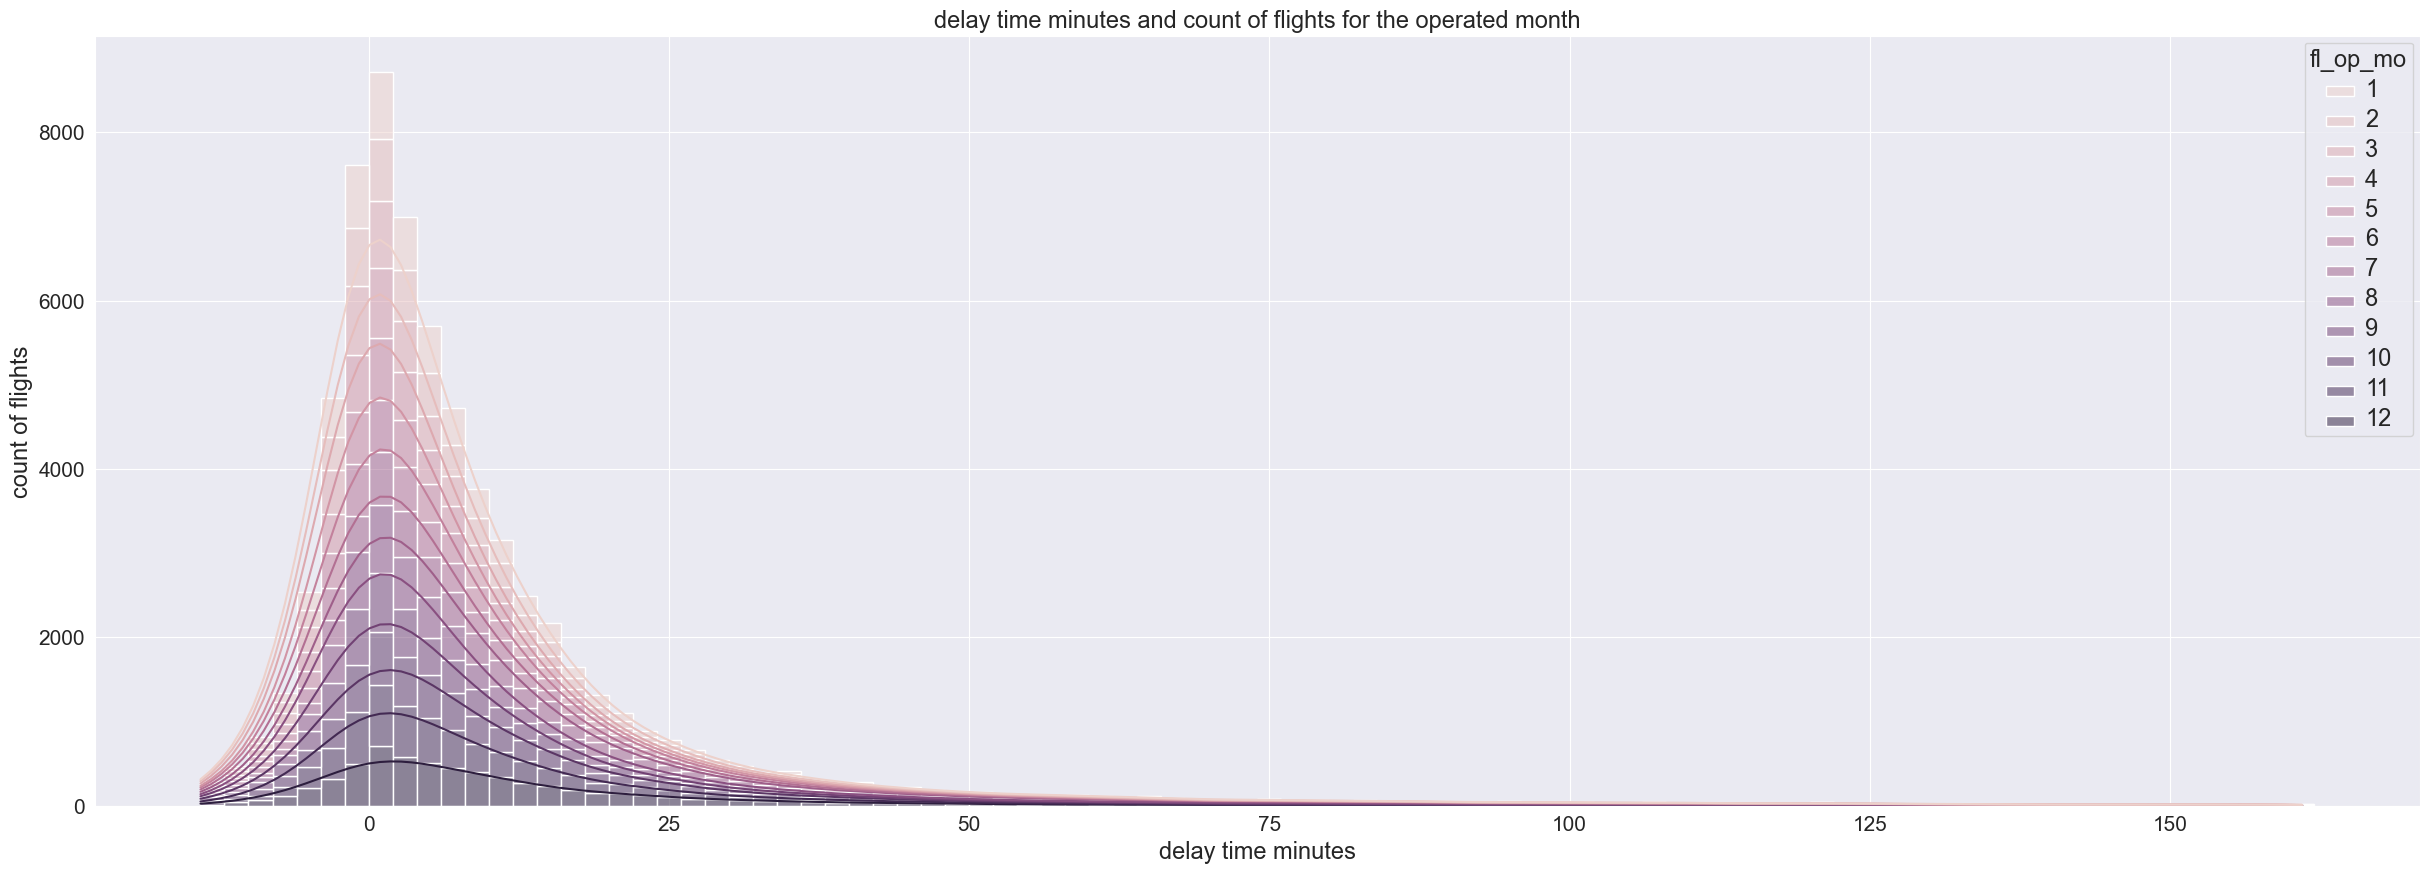

In [25]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='fl_op_mo', multiple='stack', binwidth=2, kde=True)
plt.title('delay time minutes and count of flights for the operated month', fontsize=17)
plt.xlabel('delay time minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

Another interesting figure below, shows on Sundays the airport is a lot more busy than on Saturdays

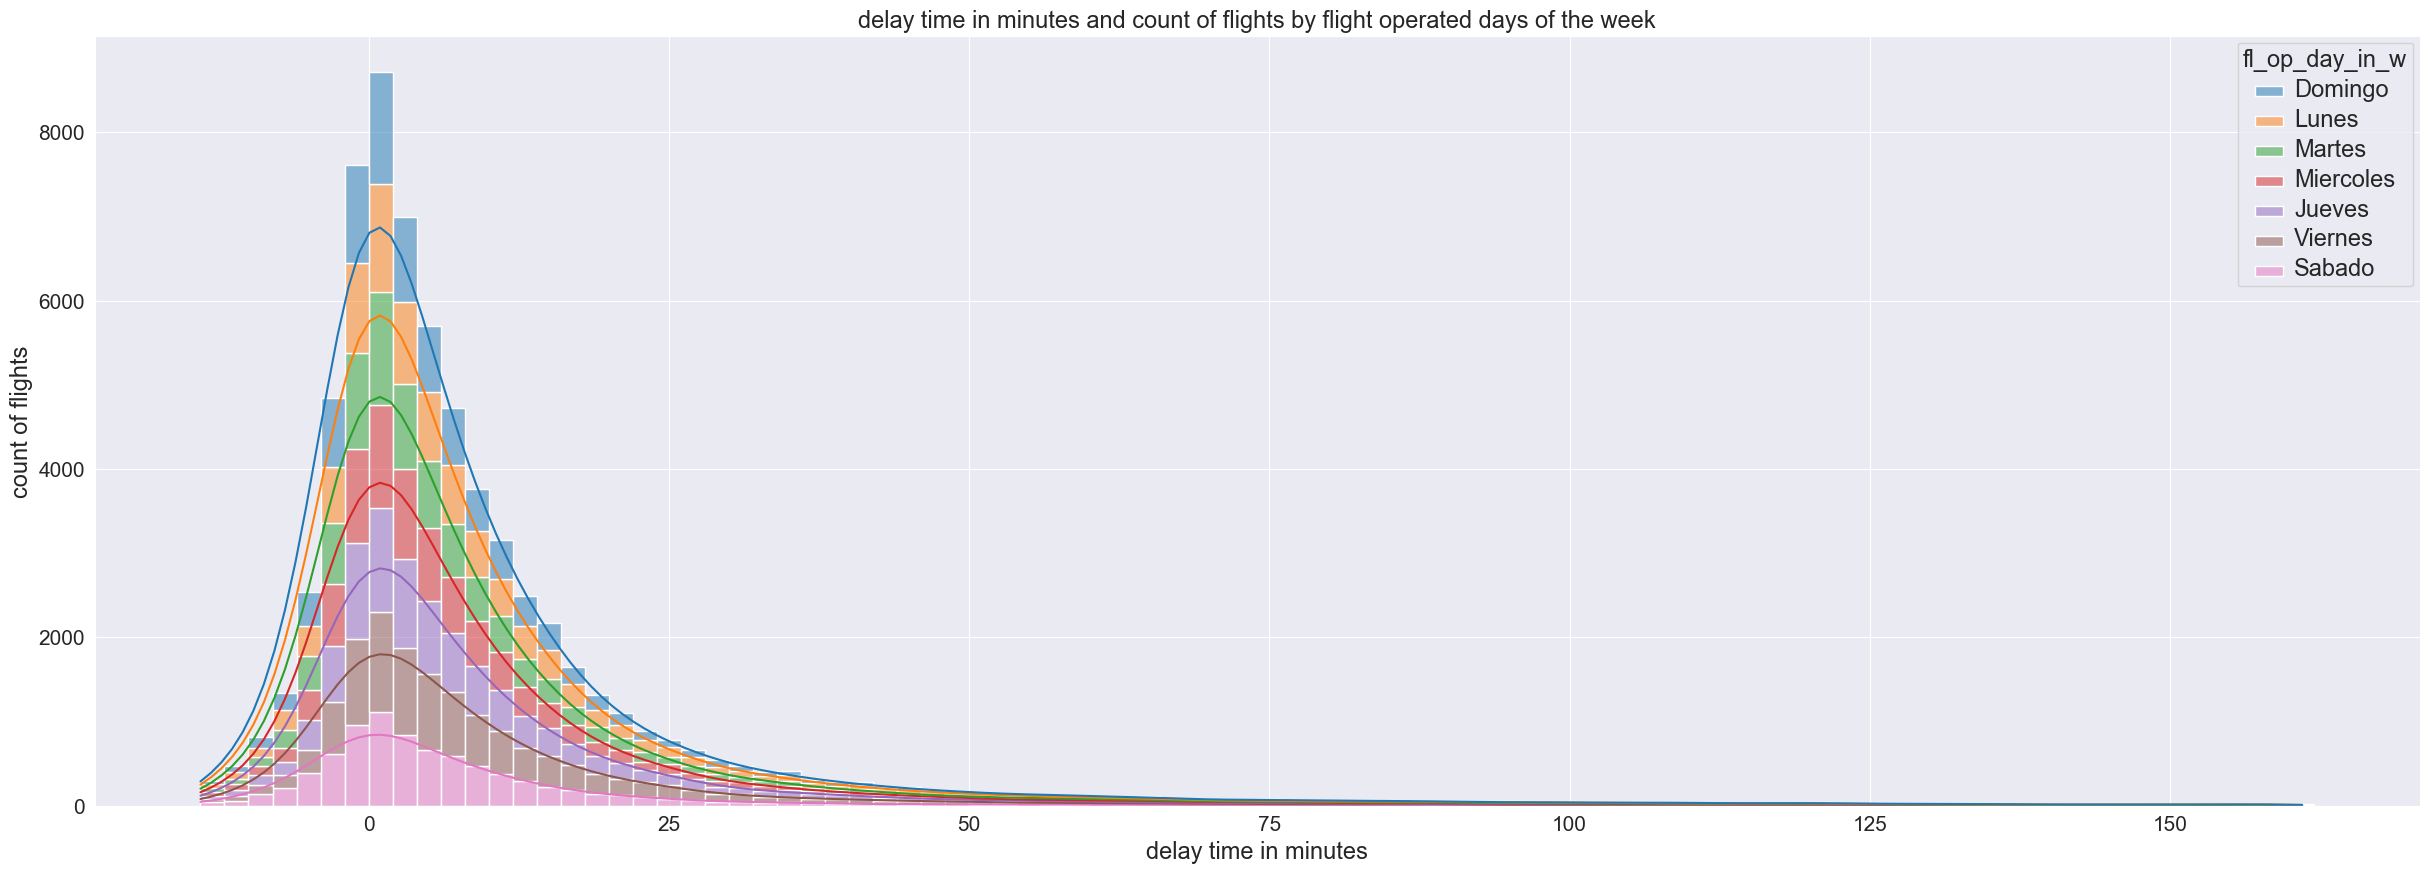

In [26]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='fl_op_day_in_w', multiple='stack', binwidth=2, kde=True)
plt.title('delay time in minutes and count of flights by flight operated days of the week', fontsize=17)
plt.xlabel('delay time in minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

Again another interesting figure shows in the first weeks of the months the airport is a lot more busy than the last weeks

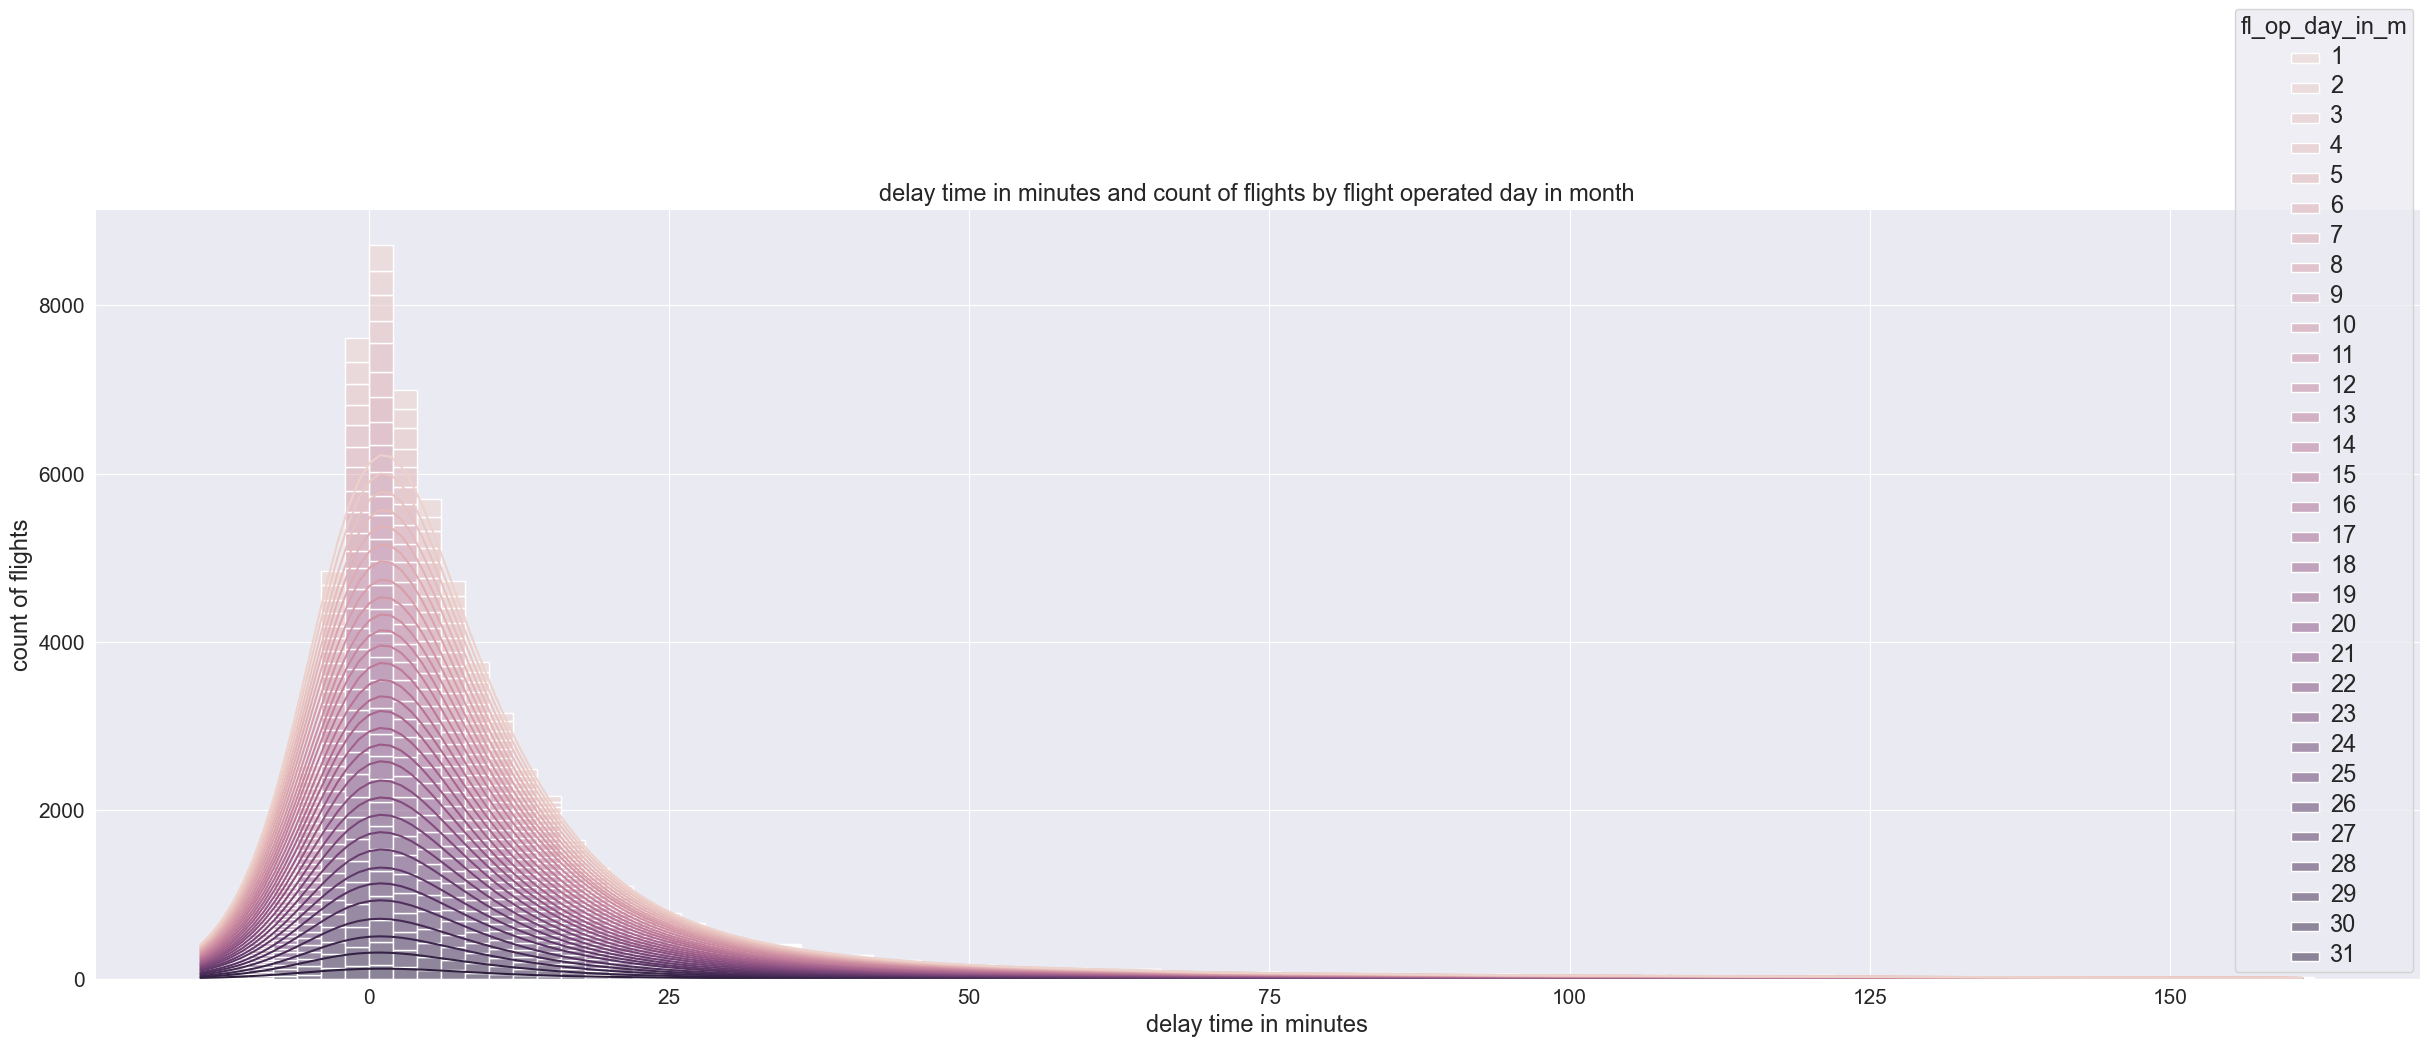

In [27]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='fl_op_day_in_m', multiple='stack', binwidth=2, kde=True)
plt.title('delay time in minutes and count of flights by flight operated day in month', fontsize=17)
plt.xlabel('delay time in minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

In this figure we see most of the flights were to the destination of Mexico, Bogota, Panama then comes Rio and Lima.

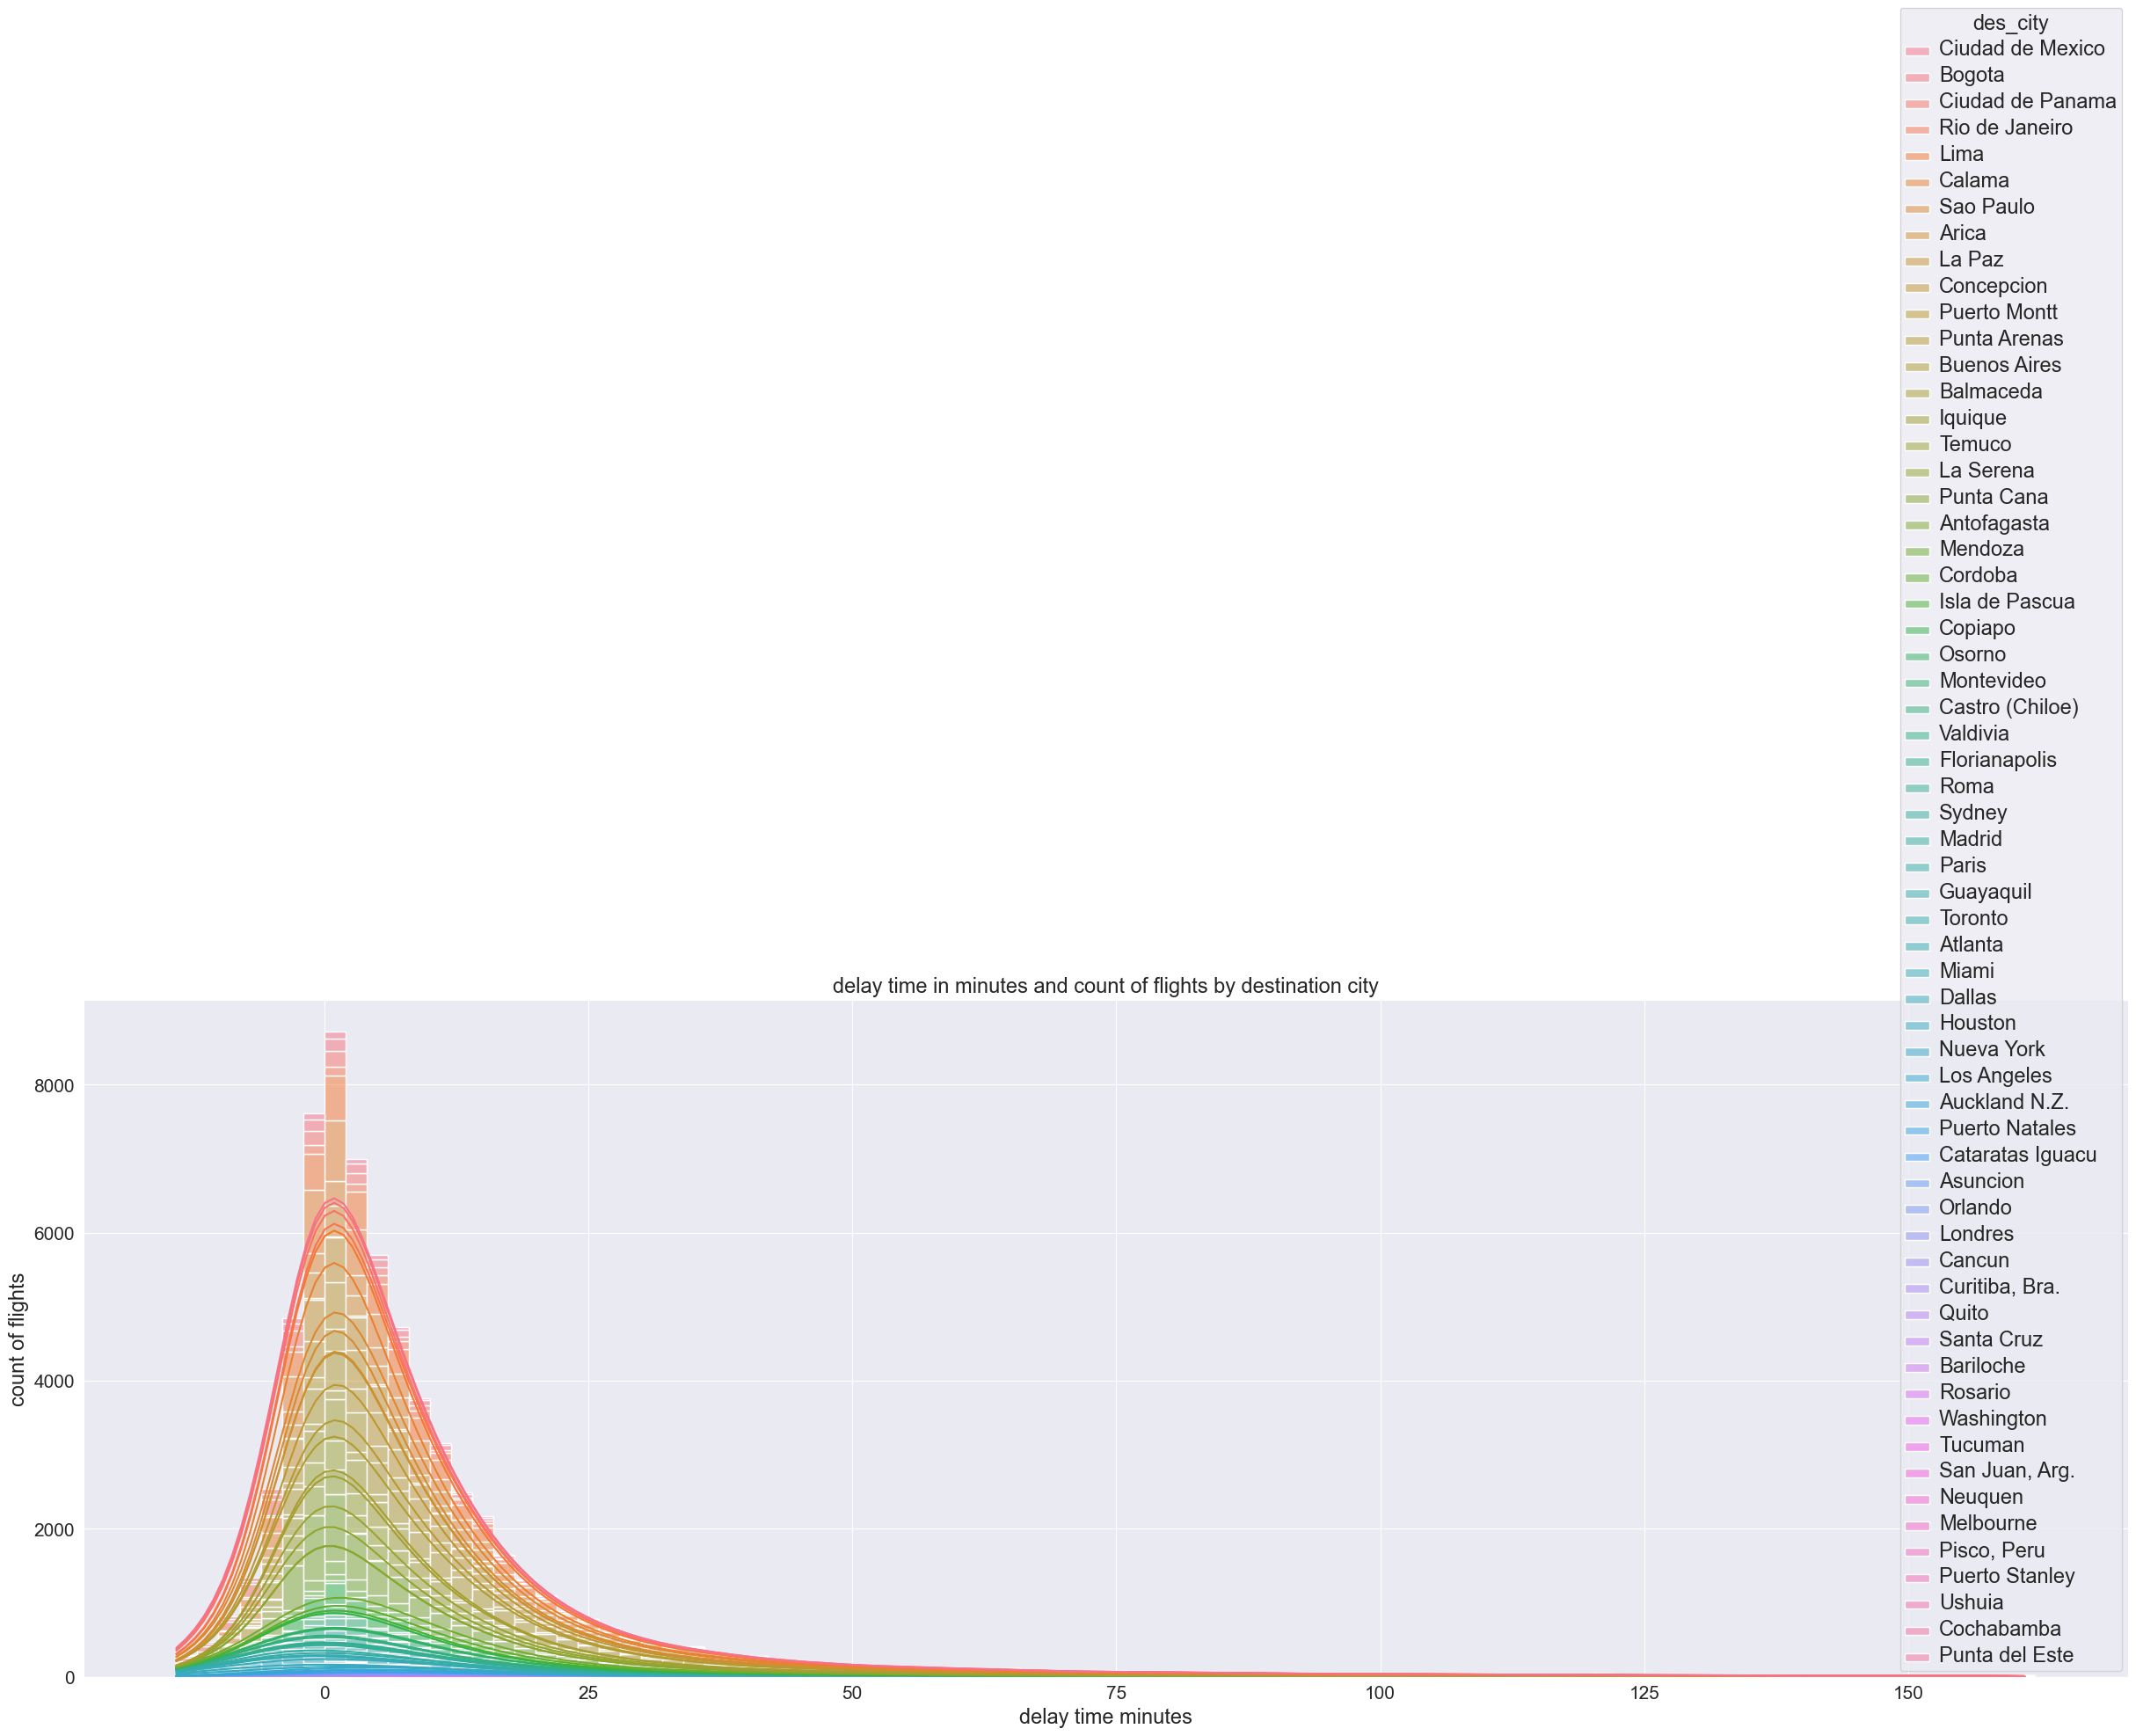

In [28]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='des_city', multiple='stack', binwidth=2, kde=True)
plt.title('delay time in minutes and count of flights by destination city', fontsize=17)
plt.xlabel('delay time minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

## Descriptive statistics, noteworthy insights to share

We can use describe() method to see descriptive statistics

In [29]:
perc=[.1, .5, .9]
df_describe = df.describe(percentiles=perc)
df_describe

,fl_op_day_in_m,fl_op_mo,fl_op_yr,delay_time_m
count,68205.000000,68205.000000,68205.000000,68205.000000
mean,15.714742,6.622667,2017.000029,9.110945
std,8.782941,3.523281,0.005415,19.313514
min,1.000000,1.000000,2017.000000,-14.000000
10%,4.000000,2.000000,2017.000000,-4.000000
50%,16.000000,7.000000,2017.000000,4.000000
90%,28.000000,11.000000,2017.000000,26.000000
max,31.000000,12.000000,2018.000000,161.000000


As we can see most of (90%) of the flights were done till 28th of each month, and most were on 11th month of 2017 with delay time of at least 26 minutes, we also had some flights departed at earlier time than scheduled, on average there were 9 minutes delay time; standard deviation assumes normal distribution though we can see delay time of 19 minutes matches with most of the flights, they had departed 10 minutes early up to 28 minutes of delay as depicted in the previous histograms. Only few of them had departed earlier than 10 minutes and just a few had long delay time of about 2 to 2.5 hours. Generally looking, Santiago airport in 2017 and 2018 was managed considerably great according to the plan of not having long delays.

for more information we can visualize the descriptive analysis below

### Plotting describe() function for numerical values

In [30]:
num_col = df._get_numeric_data().columns #numerical columns
cat_col = list(set(df.columns)-set(num_col)) # categorical columns

In [31]:
df_num_describe = df.describe(percentiles=perc, include=['int64', 'float64'])  # just to consider those columns with numeric values
df_num_describe.reset_index(inplace=True)

In [32]:
df_num_describe = df_num_describe[df_num_describe['index'] != 'count']

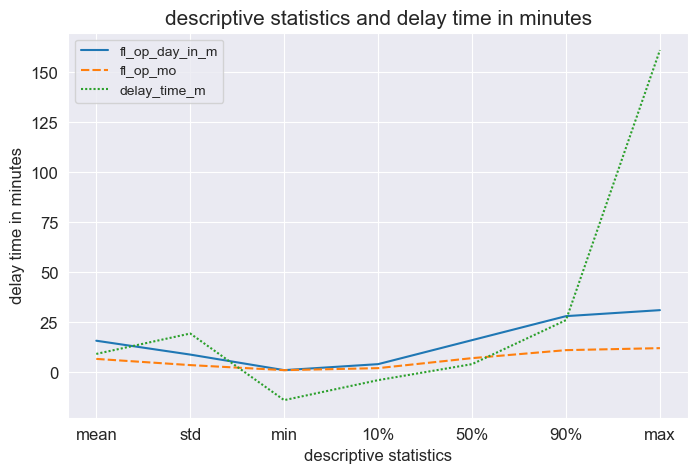

In [33]:
plt.figure(figsize=(8,5))
df_describe_temp = df_num_describe.drop(columns=['fl_op_yr'])
ax = sns.lineplot(data=df_describe_temp)
plt.title('descriptive statistics and delay time in minutes', fontsize=15)
plt.xlabel('descriptive statistics', fontsize=12)
ax.set_xticks(range(1, 8))
ax.set_xticklabels(df_describe_temp['index'].values, fontsize=12)
plt.ylabel('delay time in minutes', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Another figure which confirms our previous findings regarding the statistical quality of the flights that almost 90% of them have delay of just 25 minutes and only a few of them have long delay time, also, it clearly shows considerable number of flights have departed early.

### Plotting value_counts() for categorical variables

# 2. Generating columns by considering if thresholds has been passed for four sections
- high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
- min_diff : difference in minutes between Date-O and Date-I
- delay_15 : 1 if min_diff > 15, 0 if not.
- period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based
on Date-I .

In [34]:
# Date-I is the sch_fl_time
date_lower1 = date(2017, 7, 15)
date_upper1 = date(2017, 7, 31)
date_lower2 = date(2017, 9, 11)
date_upper2 = date(2017, 9, 30)
df['high_season'] = np.zeros(len(df)).astype(int)
df.loc[(df['sch_fl_time'].dt.date > date_lower1) & (df['sch_fl_time'].dt.date < date_upper1), 'high_season'] = 1
df.loc[(df['sch_fl_time'].dt.date > date_lower2) & (df['sch_fl_time'].dt.date < date_upper2), 'high_season'] = 1

In [35]:
df['min_diff'] = df['delay_time_m']
df['delay_15'] = np.zeros(len(df)).astype(int)
df.loc[df['min_diff'] > 15, 'delay_15'] = 1

In [36]:
df['period_day'] = np.zeros(len(df)).astype(int)
df.loc[(df['sch_fl_time'].dt.time >= time(5, 0, 0)) & (df['sch_fl_time'].dt.time <= time(11, 59, 0)), 'period_day'] = 'morning'
df.loc[(df['sch_fl_time'].dt.time >= time(12, 0, 0)) & (df['sch_fl_time'].dt.time <= time(18, 59, 0)), 'period_day'] = 'afternoon'
df.loc[(df['sch_fl_time'].dt.time >= time(19, 0, 0)) & (df['sch_fl_time'].dt.time <= time(23, 59, 0)), 'period_day'] = 'night'
df.loc[(df['sch_fl_time'].dt.time >= time(0, 0, 0)) & (df['sch_fl_time'].dt.time <= time(4, 59, 0)), 'period_day'] = 'night'

In [37]:
df['period_day'].value_counts()

afternoon    25506
morning      25351
night        17348
Name: period_day, dtype: int64

In [38]:
df.to_csv('synthetic_features.csv', columns=['high_season', 'min_diff', 'delay_15', 'period_day'])

# 3. What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight?What variables would you expect to have the most influence in predicting delays?

According to the following plot 14th and 22nd of May, 16th of June, 11th of March and 5th of February were the only days with the highest delay time. Interestingly, in the first half of the year the airport was busier than other times of the year, and accordingly all the delay times happened specifically in the 2nd, 3rd, 5th, and 6th month of the year. What did happen in that time? Maybe more people went on vacation because of the end of schools winter semester and summer time!!

<Figure size 4000x1000 with 0 Axes>

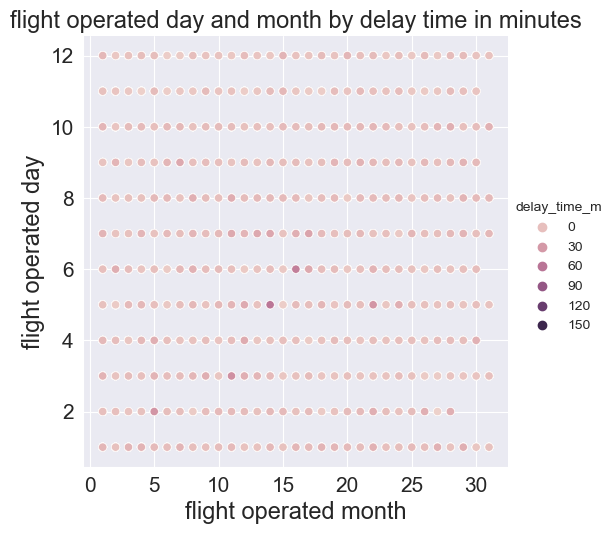

In [19]:
plt.figure(figsize=(40,10))
sns.relplot(df, x='fl_op_day_in_m', y='fl_op_mo', hue='delay_time_m')
plt.title('flight operated day and month by delay time in minutes', fontsize=17)
plt.xlabel('flight operated month', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('flight operated day', fontsize=17)
plt.yticks(fontsize=15)
plt.show()

Similar figure below confirms those 5 days with delay times.

<Figure size 4000x1000 with 0 Axes>

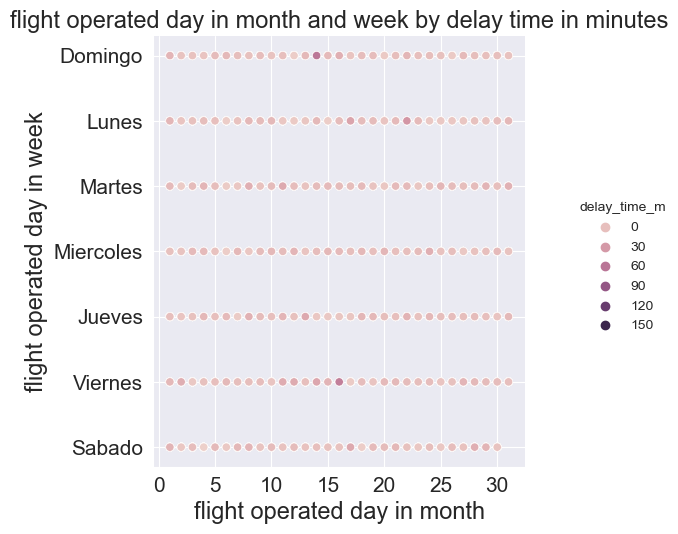

In [20]:
plt.figure(figsize=(40,10))
sns.relplot(df, x='fl_op_day_in_m', y='fl_op_day_in_w', hue='delay_time_m')
plt.title('flight operated day in month and week by delay time in minutes', fontsize=17)
plt.xlabel('flight operated day in month', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('flight operated day in week', fontsize=17)
plt.yticks(fontsize=15)
plt.show()

If I plot the bubble chart focusing on those rows of the dataset with long delay time, separating national and international flights all with respect to the destinations that would be helpful to see flights to which destinations had long delay time.

15 minutes delay time provided 6041 results. Not applicable to be shown in a plot. I would choose 45 minutes

In [167]:
df_long_delayed_dom = df.loc[(abs(df['delay_time_m']) >= 45) & (df['fl_type'] == 'N')]

In [168]:
df_long_delayed_dom.shape # 1300! Good.

(1300, 24)

<Figure size 6000x2000 with 0 Axes>

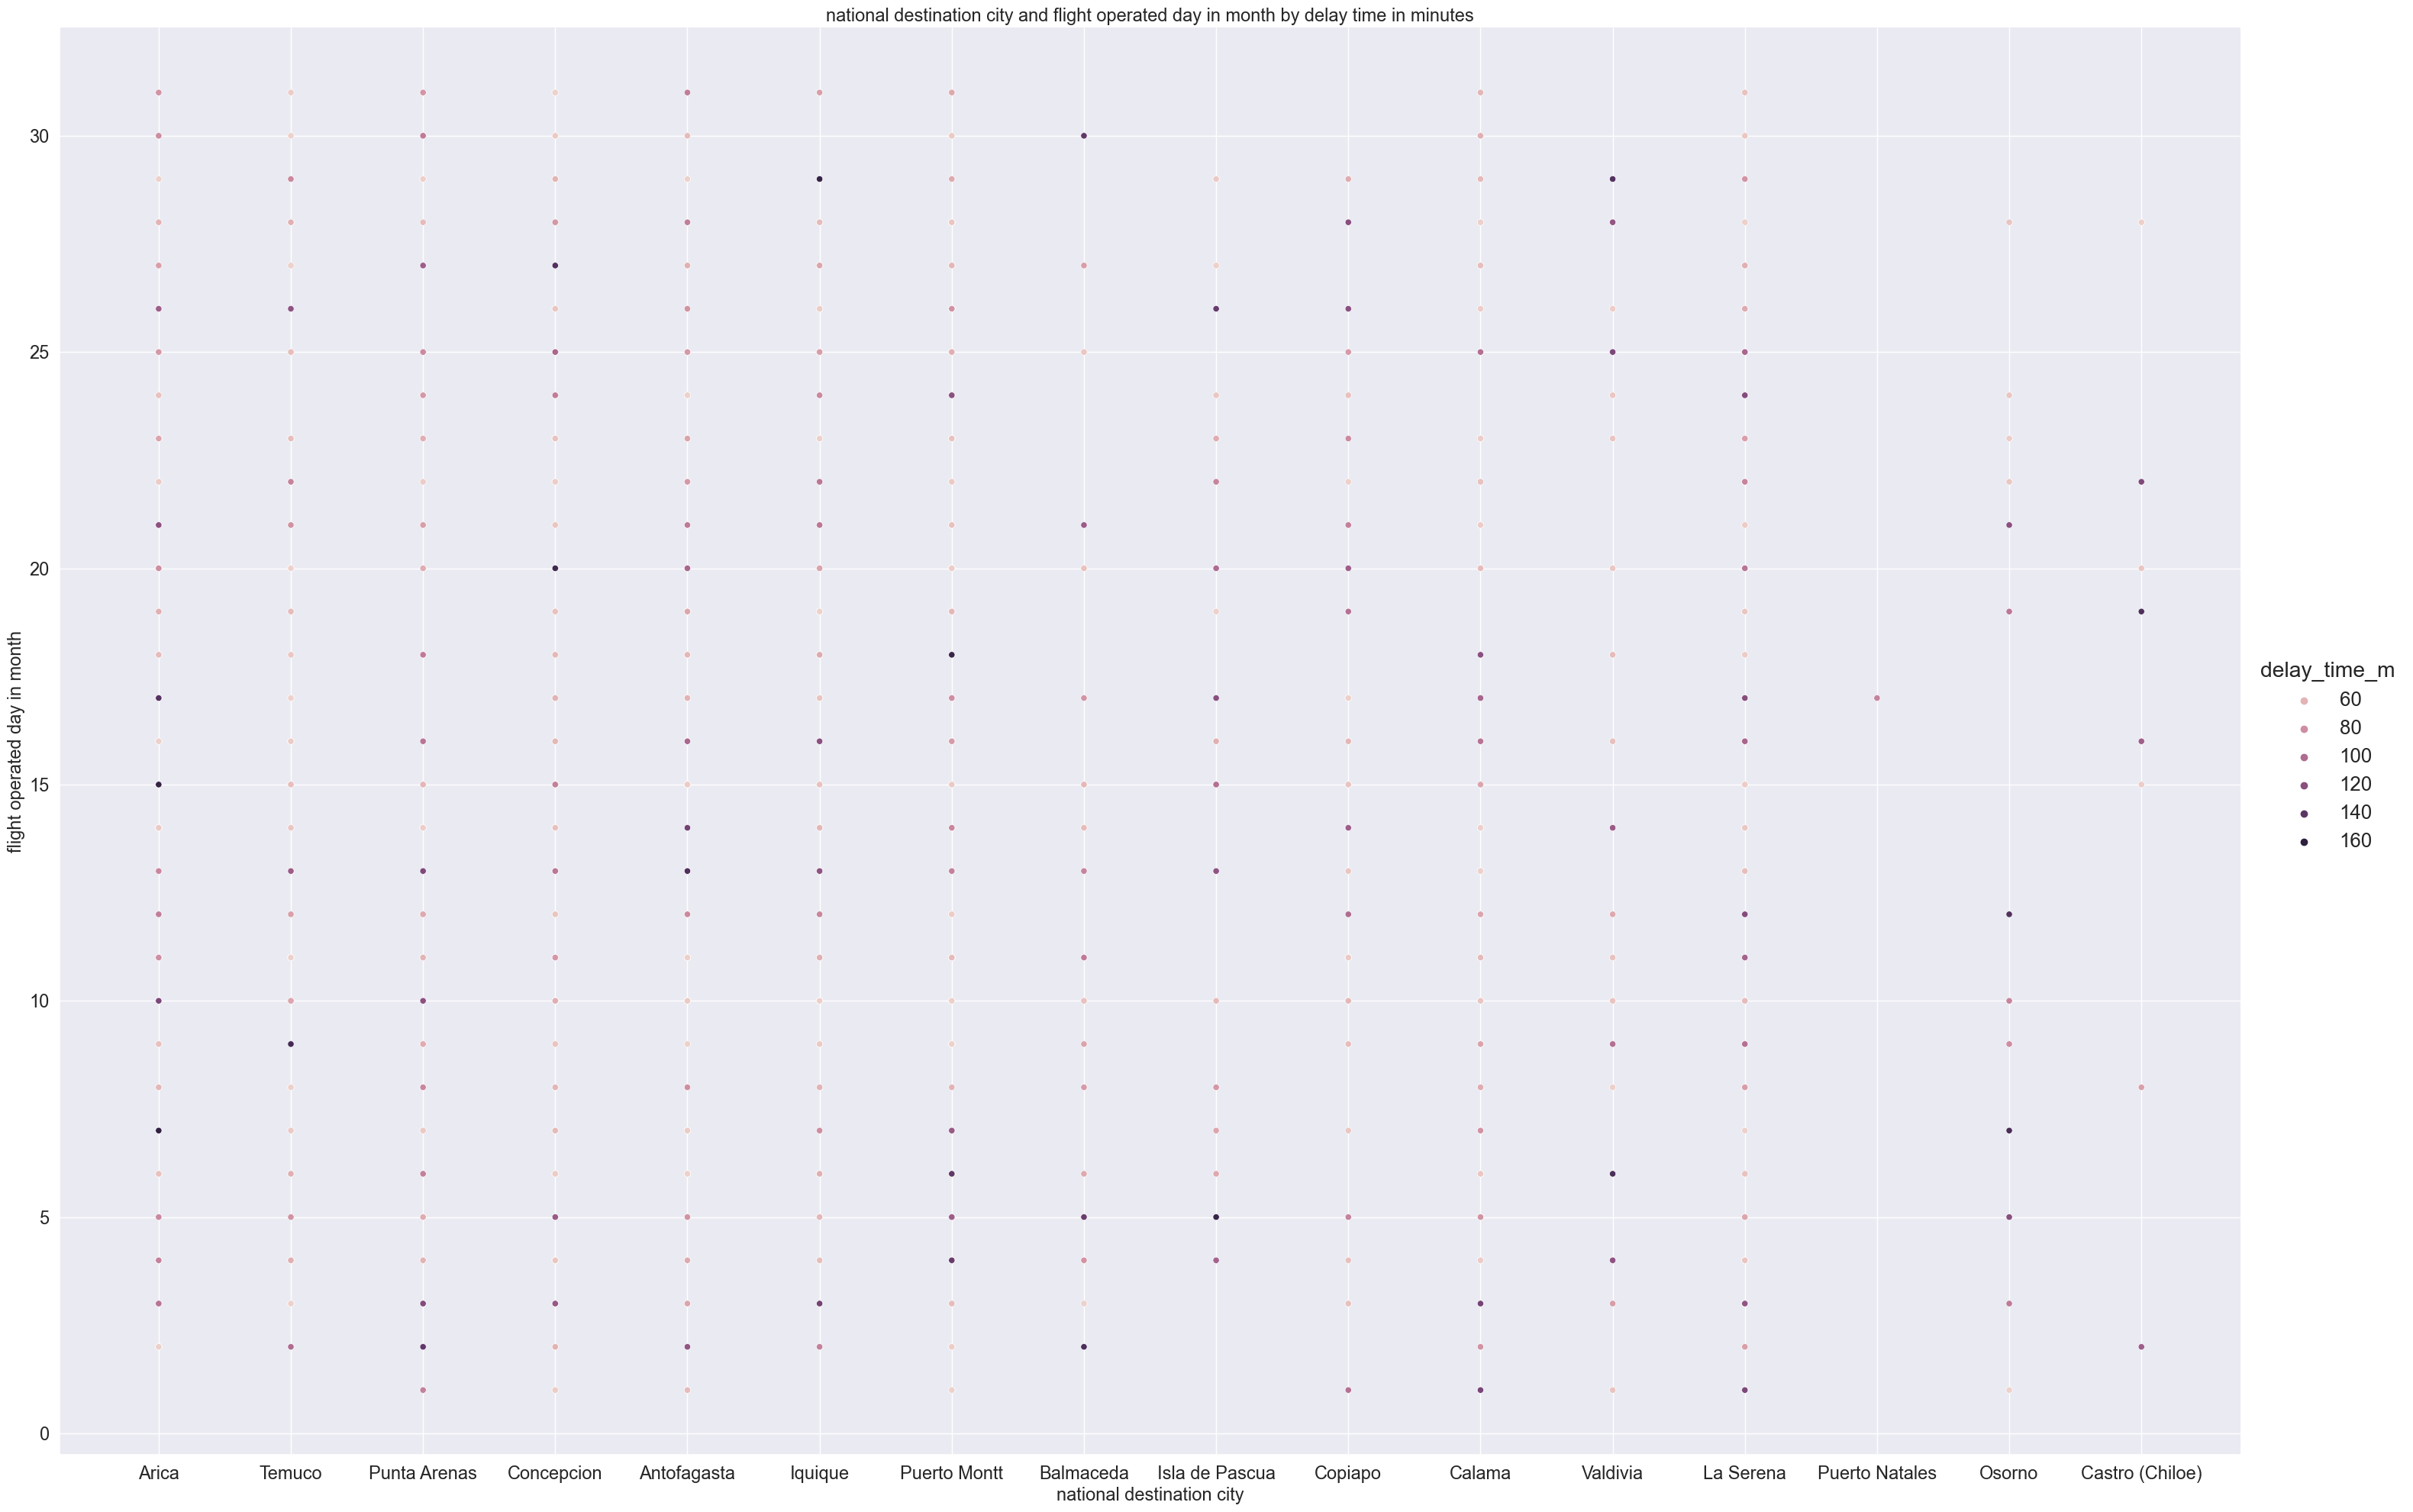

In [164]:
plt.figure(figsize=(60,20))
sns.relplot(df_long_delayed_dom, x='des_city', y='fl_op_day_in_m', hue='delay_time_m', height=20, aspect=30/20)
sns.set(font_scale=1.7)
plt.title('national destination city and flight operated day in month by delay time in minutes', fontsize=17)
plt.xlabel('national destination city', fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel('flight operated day in month', fontsize=17)
plt.yticks(fontsize=17)
  plt.show()

The cities named in the above plot's x-axis were the only national flights which had delayed more than 45 minutes. We can see some destinations like Castro(Chiloe) and Puerto Natales had few flights from Santiago but most of them delayed. For the rest the condition was half and half, definitely there is something happening, lets see what flights in which days and times they were.

In [176]:
df_long_delayed_dom.groupby(['fl_op_day_in_w', 'des_city']).value_counts()

fl_op_day_in_w  des_city     sch_fl_time          sch_fl_no  pr_ori_city_c  pr_des_city_c  sch_fl_airline_c  op_fl_time           op_fl_no  op_ori_city_c  op_des_city_c  op_fl_airline_c  fl_op_day_in_m  fl_op_mo  fl_op_yr  fl_type  op_airline   ori_city  delay_time_m  high_season  min_diff  delay_15  period_day  is_hub
Domingo         Antofagasta  2017-02-19 14:25:00  162        SCEL           SCFA           SKU               2017-02-19 15:17:00  162       SCEL           SCFA           SKU              19              2         2017      N        Sky Airline  Santiago  52.0          0            52.0      1         afternoon   1         1
                             2017-02-19 20:30:00  166        SCEL           SCFA           SKU               2017-02-19 21:19:00  166       SCEL           SCFA           SKU              19              2         2017      N        Sky Airline  Santiago  49.0          0            49.0      1         night       1         1
                           

Let's see what is happening with the international flights

45 minutes delay time was still low for international flights provide 1896 results. Considering 1 hour delay time.

In [177]:
df_long_delayed_int = df.loc[(abs(df['delay_time_m']) >= 60) & (df['fl_type'] == 'I')]

In [178]:
df_long_delayed_int.shape # 1227!! Now, it's better.

(1227, 24)

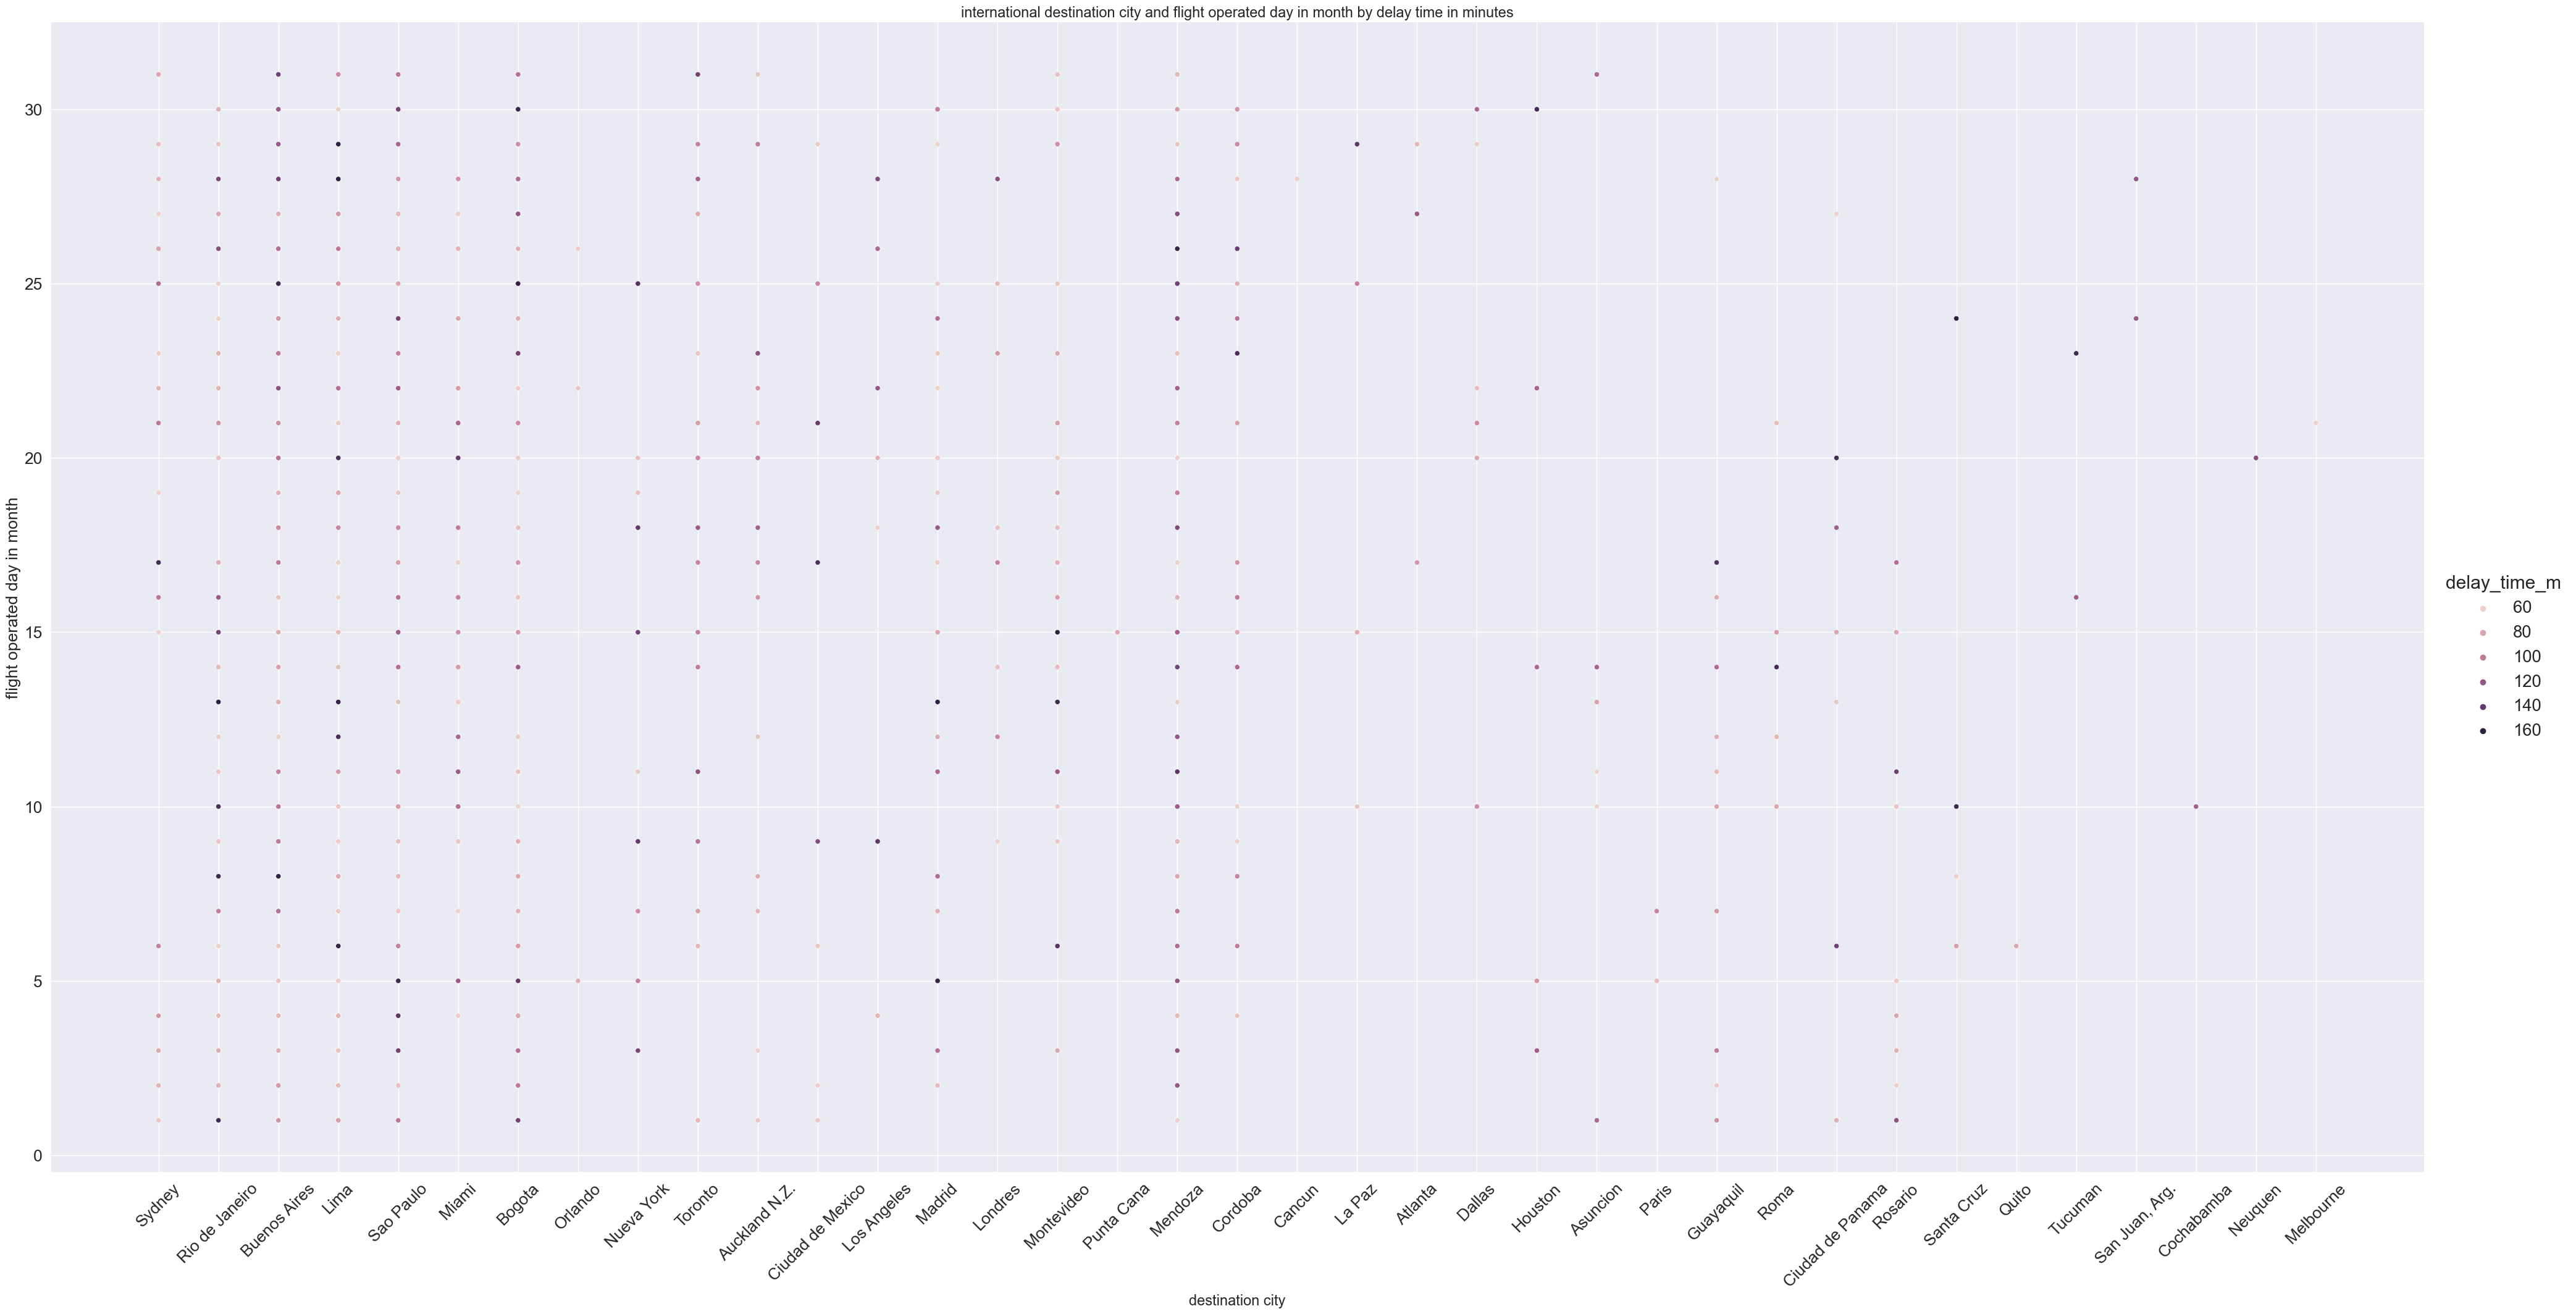

In [163]:
# plt.figure(figsize=(60,20))
sns.relplot(df_long_delayed_int, x='des_city', y='fl_op_day_in_m', hue='delay_time_m', height=20, aspect=40/20)
sns.set(font_scale=1.7)
plt.title('international destination city and flight operated day in month by delay time in minutes', fontsize=17)
plt.xlabel('destination city', fontsize=17)
plt.xticks(fontsize=19, rotation=45)
plt.ylabel('flight operated day in month', fontsize=19)
plt.yticks(fontsize=19)
plt.show()

For some cities like Mendoza most of the flights had delayed more than 2 hours, other cities like Tucuman, San Juan Arg, Cochbamba, Neuquen had all their flights delayed for more than 2 hours.

There is a lot more here to say, but lets move forward for Machine Learning algorithms.

# 4. Train one or several models to estimate the likelihood of a flight delay

## 4.1 Adding being a hub airport(busy) since it has major effects

In [39]:
df['is_hub'] = np.zeros(len(df)).astype(int)

In [40]:
# This dictionary of being a hub airport or not is provided by online searching for each of these airports, 1 if they are a hub, 0 if they are not

dic_hub_airports = {'SCFA':1, 'SPJC':1, 'SCCF':0, 'SCTE':0, 'SCIE':0, 'SCDA':0, 'SBGR':1, 'SAEZ':1, 'SABE':1,
       'SCQP':1, 'SCAR':0, 'SCSE':1, 'SCCI':1, 'MPTO':1, 'SCAT':0, 'SAME':0, 'SKBO':1, 'SBGL':1,
       'SUMU':0, 'SACO':0, 'KMIA':1, 'LEMD':1, 'SCBA':0, 'SCVD':0, 'MMMX':1, 'SCIP':0, 'SEGU':1,
       'KJFK':1, 'NZAA':1, 'LFPG':1, 'KATL':1, 'KDFW':1, 'KIAH':1, 'CYYZ':1, 'SCJO':0, 'LIRF':1,
       'SCPQ':0, 'SGAS':1, 'SLLP':1, 'EGLL':1, 'YSSY':1, 'SBFL':0, 'KLAX':1, 'SAAR':0, 'SLVR':1,
       'SCNT':0, 'MMUN':1, 'MDPC':0, 'YMML':1, 'SANT':0, 'SAZN':0, 'SANU':0, 'KMCO':1, 'SAWH':0,
       'SULS':1, 'SBCT':1, 'SBFI':0, 'SAZS':0, 'SEQM':1, 'KIAD':1, 'SPSO':0, 'EGYP':0, 'SLCB':1}

In [41]:
for key, value in dic_hub_airports.items():
       df.loc[df['op_des_city_c'] == key, 'is_hub'] = value

# 5. Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in the prediction task? How could you improve the Performance?

In [42]:
df['sch_fl_time'].dt.year.value_counts()

2017    68205
Name: sch_fl_time, dtype: int64

In [43]:
df['op_fl_time'].dt.year.value_counts()

2017    68203
2018        2
Name: op_fl_time, dtype: int64